# 실습 모듈

In [349]:
# csv 경로 입력
local = '/content/drive/MyDrive/머신러닝 실습/데이터/data0405.csv'

# 경사하강법 설정
irate = 0.001
epochs = 500

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = pd.read_csv(local, usecols = ['x']).values
y = pd.read_csv(local, usecols = ['y']).values

def plot_data():
  plt.figure(figsize = (6, 4))
  plt.title('Training data', fontsize = 16)
  plt.xlabel('X', fontsize = 12)
  plt.ylabel('Y', fontsize = 12)
  plt.plot(x, y, 'bo', label = "Training data")

def show_least_square(d):
  A = np.hstack([x**i for i in range(d + 1)])
  A = np.asmatrix(A)
  w = (A.T * A).I * A.T * y

  xp = np.arange(x.min(), x.max(), 0.01).reshape(-1, 1)
  yp = 0
  for i in range(d + 1):
    yp += w[i, 0] * xp**i

  plot_data()
  plt.title('Least Square', fontsize = 16)
  plt.plot(xp, yp, 'r', linewidth = 2, label = f'{d}nd Degree')
  plt.legend()
  plt.grid(alpha = 0.4)

  plt.show()
  print('omega :\n', w)

def show_gradient_descent(d):
  A = np.hstack([x**i for i in range(d + 1)])
  w = np.zeros((d + 1, 1))
  n = len(x)

  for _ in range(epochs):
      y_pred = A @ w
      dw = (1 / n) * (A.T @ (y_pred - y))
      w -= irate * dw

  xp = np.arange(x.min(), x.max(), 0.01).reshape(-1, 1)
  polybasis = np.hstack([xp**i for i in range(d + 1)])
  yp = polybasis @ w

  plot_data()
  plt.title('Gradient Descent', fontsize = 16)
  plt.plot(xp, yp, 'r', linewidth = 2, label = f'{d}nd Degree')
  plt.legend()
  plt.grid(alpha = 0.4)

  plt.show()
  print('omega :\n', w)

# 실습 코드 작성
# 최소제곱법 : show_least_square(degree)
# 경사하강법 : show_gradient_descent(degree)

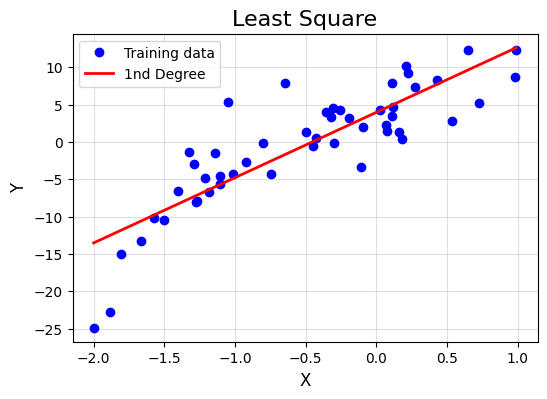

omega :
 [[3.94188011]
 [8.73592461]]


In [350]:
show_least_square(1)

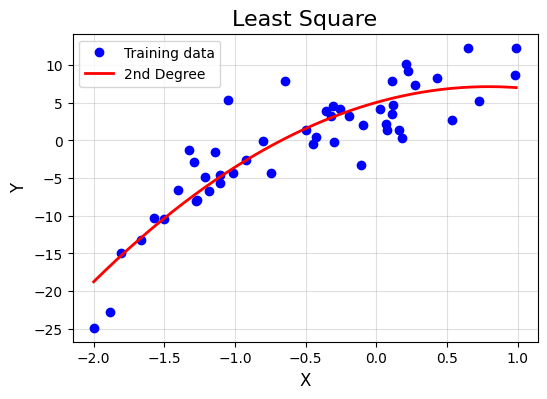

omega :
 [[ 5.03906362]
 [ 5.27924916]
 [-3.31676315]]


In [351]:
show_least_square(2)

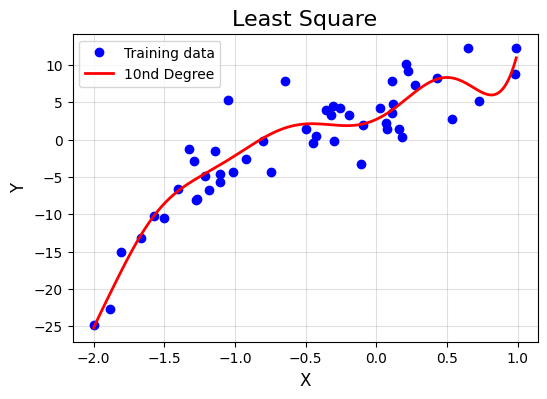

omega :
 [[  2.70561069]
 [  8.7466361 ]
 [ 24.11081469]
 [ -7.17740071]
 [-70.59489961]
 [-20.12073822]
 [ 59.53548381]
 [ 36.49128236]
 [ -8.88620274]
 [-11.06845324]
 [ -2.15841396]]


In [352]:
show_least_square(10)

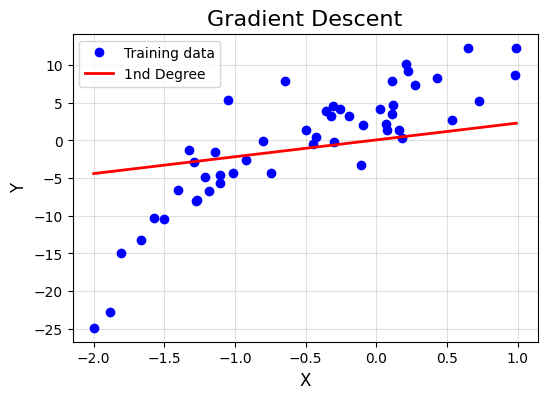

omega :
 [[0.06825886]
 [2.23603262]]


In [353]:
show_gradient_descent(1)

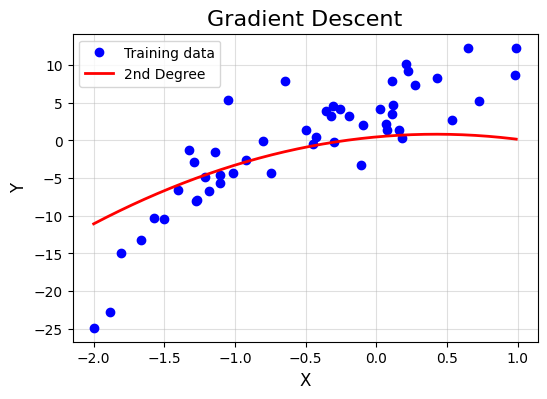

omega :
 [[ 0.46137619]
 [ 1.71642697]
 [-2.02921761]]


In [354]:
show_gradient_descent(2)

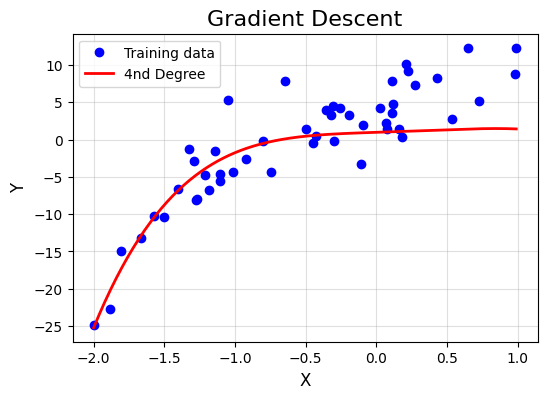

omega :
 [[ 0.96730967]
 [ 0.61615766]
 [-0.09587643]
 [ 0.9784752 ]
 [-1.04970844]]


In [355]:
show_gradient_descent(4)

# 두 방법 비교
### 최소 제곱법은 한 번의 계산으로 최적의 값을 찾는 반면, 경사하강법은 반복적인 업데이트를 통해 점진적으로 최적의 값을 찾아간다. 경사 하강법의 학습률은  0.001이고 반복 횟수는 500이기 떄문에, 최소 제곱법에 비해 정확도가 떨어진다. 학습률이 낮기 때문에 횟수를 늘려 더욱 정확한 예측이 가능하다. 반대로 학습률을 높이는 것으로 정확한 예측을 유도할 수 있다.